In [3]:
from __future__ import print_function
import os.path
import dalmatian as dm
import pandas as pd
import sys
sys.path.insert(0, '../')
from CCLE_postp_function import *
sys.path.insert(0, '../../JKBio/')
import Datanalytics as da 
import TerraFunction as terra
from Helper import * 
%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython
from IPython.display import Image,display
from taigapy import TaigaClient
tc = TaigaClient()
import numpy as np
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from bokeh.plotting import *
from bokeh.models import HoverTool
output_notebook()
from collections import OrderedDict

Loading BokehJS ...

In [4]:
refnamespace="broad-firecloud-ccle"
refworkspace="DepMap_hg38_RNAseq"
source2="chordoma"
samplesetname="mwawerchordoma"
gcpfolder= 'jkobject'
prefix='chordoma_mwawer/'
release = samplesetname

In [5]:
refwm = dm.WorkspaceManager(refnamespace, refworkspace)

# Generate sample set from new samples

In [10]:
terra.uploadFromFolder(gcpfolder, prefix, refwm, fformat="fastq12", samplesetname=samplesetname, sep='@')

please be sure you gave access to your terra email account access to this bucket
> /Users/jeremie/Documents/Projects/BroadInstitute/JKBio/TerraFunction.py(165)uploadFromFolder()
-> df = pd.DataFrame(data)
(Pdb) c
Successfully imported 5 participants.
Successfully imported 5 samples.
Successfully imported 1 sample sets:
  * mwawerchordoma (5 samples)


# run the pipeline

In [11]:
samtofastq = refwm.get_config("samtofastq_v1-0_BETA_cfg")
samtofastq

{'deleted': False,
 'inputs': {'samtofastq_workflow.samtofastq.prefix': 'this.name',
  'samtofastq_workflow.samtofastq.disk_space': '100',
  'samtofastq_workflow.samtofastq.num_threads': '1',
  'samtofastq_workflow.samtofastq.memory': '8',
  'samtofastq_workflow.samtofastq.num_preempt': '5',
  'samtofastq_workflow.samtofastq.input_bam_cram': 'this.WES_bam'},
 'methodConfigVersion': 5,
 'methodRepoMethod': {'methodName': 'samtofastq_v1-0_BETA',
  'methodVersion': 5,
  'methodNamespace': 'broadinstitute_gtex',
  'methodUri': 'agora://broadinstitute_gtex/samtofastq_v1-0_BETA/5',
  'sourceRepo': 'agora'},
 'name': 'samtofastq_v1-0_BETA_cfg',
 'namespace': 'broadinstitute_gtex',
 'outputs': {'samtofastq_workflow.samtofastq.fastq1': 'this.fastq1',
  'samtofastq_workflow.samtofastq.fastq2': 'this.fastq2'},
 'prerequisites': {},
 'rootEntityType': 'sample'}

## don't need to do when already got FASTQ

In [12]:
samtofastq['samtofastq_workflow.samtofastq.input_bam_cram']= 'this.WES_bam'
refwm.update_config(samtofastq)
submission_id = refwm.create_submission(samtofastq['name'], samplesetname,'sample_set',expression='this.samples')

Successfully updated configuration broadinstitute_gtex/samtofastq_v1-0_BETA_cfg
Successfully created submission 78ffe196-eb52-406d-bd18-87d2cd7e5871.


In [13]:
terra.waitForSubmission(refwm, submission_id)

JHC7
MUGCHOR1
UCH1
UCH2
UMCHOR1
0.0 of jobs Succeeded in submission 0.


['JHC7', 'MUGCHOR1', 'UCH1', 'UCH2', 'UMCHOR1']

In [14]:
star = refwm.get_config("star_v1-0_BETA_cfg")
star

{'deleted': False,
 'inputs': {'star_workflow.star.outSAMattrRGline': '"ID:rg1 SM:sm1"',
  'star_workflow.star.num_threads': '8',
  'star_workflow.star.alignSoftClipAtReferenceEnds': '"Yes"',
  'star_workflow.star.alignMatesGapMax': '1000000',
  'star_workflow.star.outFilterType': '"BySJout"',
  'star_workflow.star.prefix': 'this.name',
  'star_workflow.star.num_preempt': '5',
  'star_workflow.star.alignSJoverhangMin': '8',
  'star_workflow.star.chimOutJunctionFormat': '1',
  'star_workflow.star.memory': '52',
  'star_workflow.star.fastq2': 'this.fastq2',
  'star_workflow.star.outFilterMismatchNoverLmax': '0.1',
  'star_workflow.star.alignIntronMax': '1000000',
  'star_workflow.star.star_index': 'workspace.star_index',
  'star_workflow.star.outSAMattributes': '"NH HI AS nM NM ch"',
  'star_workflow.star.outSAMstrandField': '"intronMotif"',
  'star_workflow.star.limitSjdbInsertNsj': '1200000',
  'star_workflow.star.chimSegmentMin': '15',
  'star_workflow.star.chimJunctionOverhangMin': '

In [15]:
refwm.update_config(star)
submission_id = refwm.create_submission(star['name'], samplesetname,'sample_set',expression='this.samples')


Successfully updated configuration broadinstitute_gtex/star_v1-0_BETA_cfg
Successfully created submission 12e83686-6353-43dd-9ee8-81b3791d16de.


In [18]:
terra.waitForSubmission(refwm, submission_id)

1.0 of jobs Succeeded in submission 0.


[]

In [19]:
rsem = refwm.get_config("rsem_v1-0_BETA_cfg")
rsem

{'deleted': False,
 'inputs': {'rsem_workflow.rsem.transcriptome_bam': 'this.star_transcriptome_bam',
  'rsem_workflow.rsem.max_frag_len': '1000',
  'rsem_workflow.rsem.memory': '50',
  'rsem_workflow.rsem.prefix': 'this.name',
  'rsem_workflow.rsem.disk_space': '100',
  'rsem_workflow.rsem.estimate_rspd': '"true"',
  'rsem_workflow.rsem.is_stranded': '"false"',
  'rsem_workflow.rsem.rsem_reference': 'workspace.rsem_reference',
  'rsem_workflow.rsem.num_preempt': '5',
  'rsem_workflow.rsem.num_threads': '2'},
 'methodConfigVersion': 6,
 'methodRepoMethod': {'methodName': 'rsem_v1-0_BETA',
  'methodVersion': 4,
  'methodNamespace': 'broadinstitute_gtex',
  'methodUri': 'agora://broadinstitute_gtex/rsem_v1-0_BETA/4',
  'sourceRepo': 'agora'},
 'name': 'rsem_v1-0_BETA_cfg',
 'namespace': 'broadinstitute_gtex',
 'outputs': {'rsem_workflow.rsem.genes': 'this.rsem_genes',
  'rsem_workflow.rsem.isoforms': 'this.rsem_isoforms'},
 'prerequisites': {},
 'rootEntityType': 'sample'}

In [20]:
refwm.update_config(rsem)
submission_id1 = refwm.create_submission(rsem['name'], samplesetname,'sample_set',expression='this.samples')

Successfully updated configuration broadinstitute_gtex/rsem_v1-0_BETA_cfg
Successfully created submission 708c5e5f-6109-48c0-957b-a83d8defd9d7.


In [ ]:
terra.waitForSubmission(refwm, submission_id1)

In [ ]:
aggregate = refwm.get_config("rsem_aggregate_results_v1-0_BETA_cfg")
aggregate

In [57]:
submission_id1 = refwm.create_submission(aggregate['name'], 'samplesetname')

Successfully created submission 2840c346-6310-4bbb-ad3b-053f6692d4d7.


## Expression post processing

In [58]:
terra.waitForSubmission(refwm, submission_id1)

NameError: name 'wait_for_submission' is not defined

In [6]:
%%R
release <- 'Chordoma'

In [7]:
%%R
library('taigr')

2019-07-11 10:22:00::WARNING  R[write to console]: Le chargement a nécessité le package : RCurl

2019-07-11 10:22:00::WARNING  R[write to console]: Le chargement a nécessité le package : bitops

2019-07-11 10:22:01::WARNING  R[write to console]: Le chargement a nécessité le package : httr



In [14]:
%%R
source('../../JKBio/gkugener/RScripts/load_libraries_and_annotations.R')

2019-07-11 10:23:05::WARNING  R[write to console]: 
Attachement du package : ‘dplyr’


2019-07-11 10:23:05::WARNING  R[write to console]: The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


2019-07-11 10:23:05::WARNING  R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


2019-07-11 10:23:05::WARNING  R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


2019-07-11 10:23:05::WARNING  R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

2019-07-11 10:23:05::WARNING  R[write to console]: ✔ ggplot2 3.2.0     ✔ readr   1.3.1
✔ tibble  2.1.3     ✔ purrr   0.3.2
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ ggplot2 3.2.0     ✔ forcats 0.4.0

2019-07-11 10:23:05::WARNING  R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_confl

2019-07-11 10:23:06::WARNING  R[write to console]: Le chargement a nécessité le package : S4Vectors

2019-07-11 10:23:07::WARNING  R[write to console]: 
Attachement du package : ‘S4Vectors’


2019-07-11 10:23:07::WARNING  R[write to console]: The following objects are masked from ‘package:data.table’:

    first, second


2019-07-11 10:23:07::WARNING  R[write to console]: The following object is masked from ‘package:plotly’:

    rename


2019-07-11 10:23:07::WARNING  R[write to console]: The following object is masked from ‘package:tidyr’:

    expand


2019-07-11 10:23:07::WARNING  R[write to console]: The following objects are masked from ‘package:dplyr’:

    first, rename


2019-07-11 10:23:07::WARNING  R[write to console]: The following object is masked from ‘package:plyr’:

    rename


2019-07-11 10:23:07::WARNING  R[write to console]: The following object is masked from ‘package:base’:

    expand.grid


2019-07-11 10:23:07::WARNING  R[write to console]: Le chargement a nécess

In [15]:
%%R
source('../CCLE_postp_function.R')

2019-07-11 10:23:10::WARNING  R[write to console]: 



In [10]:
res = refwm.get_sample_sets().loc[samplesetname]
res

fusions_star                                                                     NaN
mergedExonUsageRObj_hg38                                                         NaN
rsem_genes_expected_count          gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd5004...
rsem_genes_tpm                     gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd5004...
rsem_transcripts_expected_count    gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd5004...
rsem_transcripts_isopct            gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd5004...
rsem_transcripts_tpm               gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd5004...
samples                                        [JHC7, MUGCHOR1, UCH1, UCH2, UMCHOR1]
Name: mwawerchordoma, dtype: object

In [11]:
rsem_genes_expected_count = res['rsem_genes_expected_count']
rsem_genes_tpm = res['rsem_genes_tpm']
rsem_transcripts_tpm = res['rsem_transcripts_tpm']
! gsutil cp $rsem_genes_expected_count "temp/expression.expectedcount.txt.gz" & gsutil cp $rsem_genes_tpm "temp/expression.genes.tpm.txt.gz" & gsutil cp $rsem_transcripts_tpm "temp/expression.transcript.tpm.txt.gz"

Copying gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd50046a968/6f06b920-268c-4c18-9961-9fd6c5470d3f/rsem_aggregate_results_workflow/0723ba17-77c6-4daf-a3e5-8d4c09816a99/call-rsem_aggregate_results/attempt-3/mwawerchordoma.rsem_genes_expected_count.txt.gz...
Copying gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd50046a968/6f06b920-268c-4c18-9961-9fd6c5470d3f/rsem_aggregate_results_workflow/0723ba17-77c6-4daf-a3e5-8d4c09816a99/call-rsem_aggregate_results/attempt-3/mwawerchordoma.rsem_transcripts_tpm.txt.gz...
Copying gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd50046a968/6f06b920-268c-4c18-9961-9fd6c5470d3f/rsem_aggregate_results_workflow/0723ba17-77c6-4daf-a3e5-8d4c09816a99/call-rsem_aggregate_results/attempt-3/mwawerchordoma.rsem_genes_tpm.txt.gz...
- [1 files][  1.3 MiB/  1.3 MiB]                                                
Operation completed over 1 objects/1.3 MiB.                                      
- [1 files][  1.3 MiB/  1.3 MiB]                                                
Operati

In [12]:
%%R
# These files are downloaded from FireCloud/Terra
download_paths <- list(
  tpm_genes='temp/expression.genes.tpm.txt.gz',
  tpm_transcripts='temp/expression.transcript.tpm.txt.gz',
  counts_genes='temp/expression.expectedcount.txt.gz')

In [21]:
%%R
tpm_transcripts = readTranscripts(download_paths$tpm_transcripts)
counts_genes = readCounts(download_paths$counts_genes)
tpm_genes = readTPM(download_paths$tpm_genes)

2019-07-11 10:27:15::WARNING  R[write to console]: Parsed with column specification:
cols(
  transcript_id = col_character(),
  gene_id = col_character(),
  JHC7 = col_double(),
  MUGCHOR1 = col_double(),
  UCH1 = col_double(),
  UCH2 = col_double(),
  UMCHOR1 = col_double()
)

2019-07-11 10:27:15::WARNING  R[write to console]: Parsed with column specification:
cols(
  gene_id = col_character(),
  `transcript_id(s)` = col_character(),
  JHC7 = col_double(),
  MUGCHOR1 = col_double(),
  UCH1 = col_double(),
  UCH2 = col_double(),
  UMCHOR1 = col_double()
)

2019-07-11 10:27:16::WARNING  R[write to console]: Parsed with column specification:
cols(
  gene_id = col_character(),
  `transcript_id(s)` = col_character(),
  JHC7 = col_double(),
  MUGCHOR1 = col_double(),
  UCH1 = col_double(),
  UCH2 = col_double(),
  UMCHOR1 = col_double()
)



In [22]:
%%R
head(corner(counts_genes))

# A tibble: 5 x 5
  gene_id      `transcript_id(s)`                            JHC7 MUGCHOR1  UCH1
  <chr>        <chr>                                        <dbl>    <dbl> <dbl>
1 ENSG0000000… ENST00000373020.8,ENST00000494424.1,ENST000…  788      782   778 
2 ENSG0000000… ENST00000373031.4,ENST00000485971.1             0        0     1 
3 ENSG0000000… ENST00000371582.8,ENST00000371584.8,ENST000… 1154     1203  1828 
4 ENSG0000000… ENST00000367770.5,ENST00000367771.10,ENST00…  444.     303.  418.
5 ENSG0000000… ENST00000286031.10,ENST00000359326.8,ENST00…  387.     578.  318.


### data exploration and QC

In [19]:
%%R
tpm_genes[,'ACH-001767']

# A tibble: 58,813 x 1
   `ACH-001767`
          <dbl>
 1         1.22
 2         0   
 3         5.51
 4         0.87
 5         0.16
 6         0   
 7         2.86
 8         2.79
 9         6.02
10         1.04
# … with 58,803 more rows


In [23]:
%%R 
# Quick QC
# We are looking for samples with a worrying amount of zeros
zero_threshold <- 39000
number_zeros <- apply(tpm_genes[,3:ncol(tpm_genes)], 2, FUN = function(x) length(x[x == 0]))
nzdf <- data.frame(CL=names(number_zeros), nz=number_zeros, stringsAsFactors = F)

In [24]:
%%R
number_zeros <- number_zeros[order(-number_zeros)]
number_zeros <- number_zeros[number_zeros < zero_threshold]
pass <- number_zeros %>% names()

# These samples failed
failed <- setdiff(colnames(tpm_genes), pass) %>% .[!(. %in% c('gene_id', 'transcript_id(s)'))]

counts_genes %<>% dplyr::select(c("gene_id","transcript_id(s)", pass))
tpm_genes %<>% dplyr::select(c("gene_id","transcript_id(s)", pass))
tpm_transcripts %<>% dplyr::select(c("transcript_id", "gene_id", pass))

In [25]:
%%R
failed

character(0)


In [26]:
%%R
# Plot of the samples that fail
plot <- ggplot(nzdf, aes(nz)) +
  geom_histogram(bins = 100, color='black', fill='white') +
  geom_vline(xintercept = zero_threshold, linetype=2) +
  geom_label_repel(data = nzdf %>% filter(nz > zero_threshold), aes(x=nz, y=0, label=CL), size=5, fill=rgb(1,1,1,0.5))

ggsave(plot, filename ='temp/ggplot.png', width=20, height = 20)

2019-07-11 10:27:29::WARNING  R[write to console]: Erreur : Aesthetics must be either length 1 or the same as the data (1): x, label

2019-07-11 10:27:29::WARNING  R[write to console]: De plus : 
2019-07-11 10:27:29::WARNING  R[write to console]: Warning messages:

2019-07-11 10:27:29::WARNING  R[write to console]: 1: 
2019-07-11 10:27:29::WARNING  R[write to console]: In read.mapping.fn() :
2019-07-11 10:27:29::WARNING  R[write to console]: 
 
2019-07-11 10:27:29::WARNING  R[write to console]:  Could not fetch mapping from https://intranet.broadinstitute.org/~datasci/cell_lines/name_mapping.csv, attempting to read most recent cached mapping from ~/.celllinemapr.Rds

2019-07-11 10:27:29::WARNING  R[write to console]: 2: 
2019-07-11 10:27:29::WARNING  R[write to console]: In doTryCatch(return(expr), name, parentenv, handler) :
2019-07-11 10:27:29::WARNING  R[write to console]: 
 
2019-07-11 10:27:29::WARNING  R[write to console]:  fermeture de la connexion inutilisée 3 (https://intranet


Erreur : Aesthetics must be either length 1 or the same as the data (1): x, label


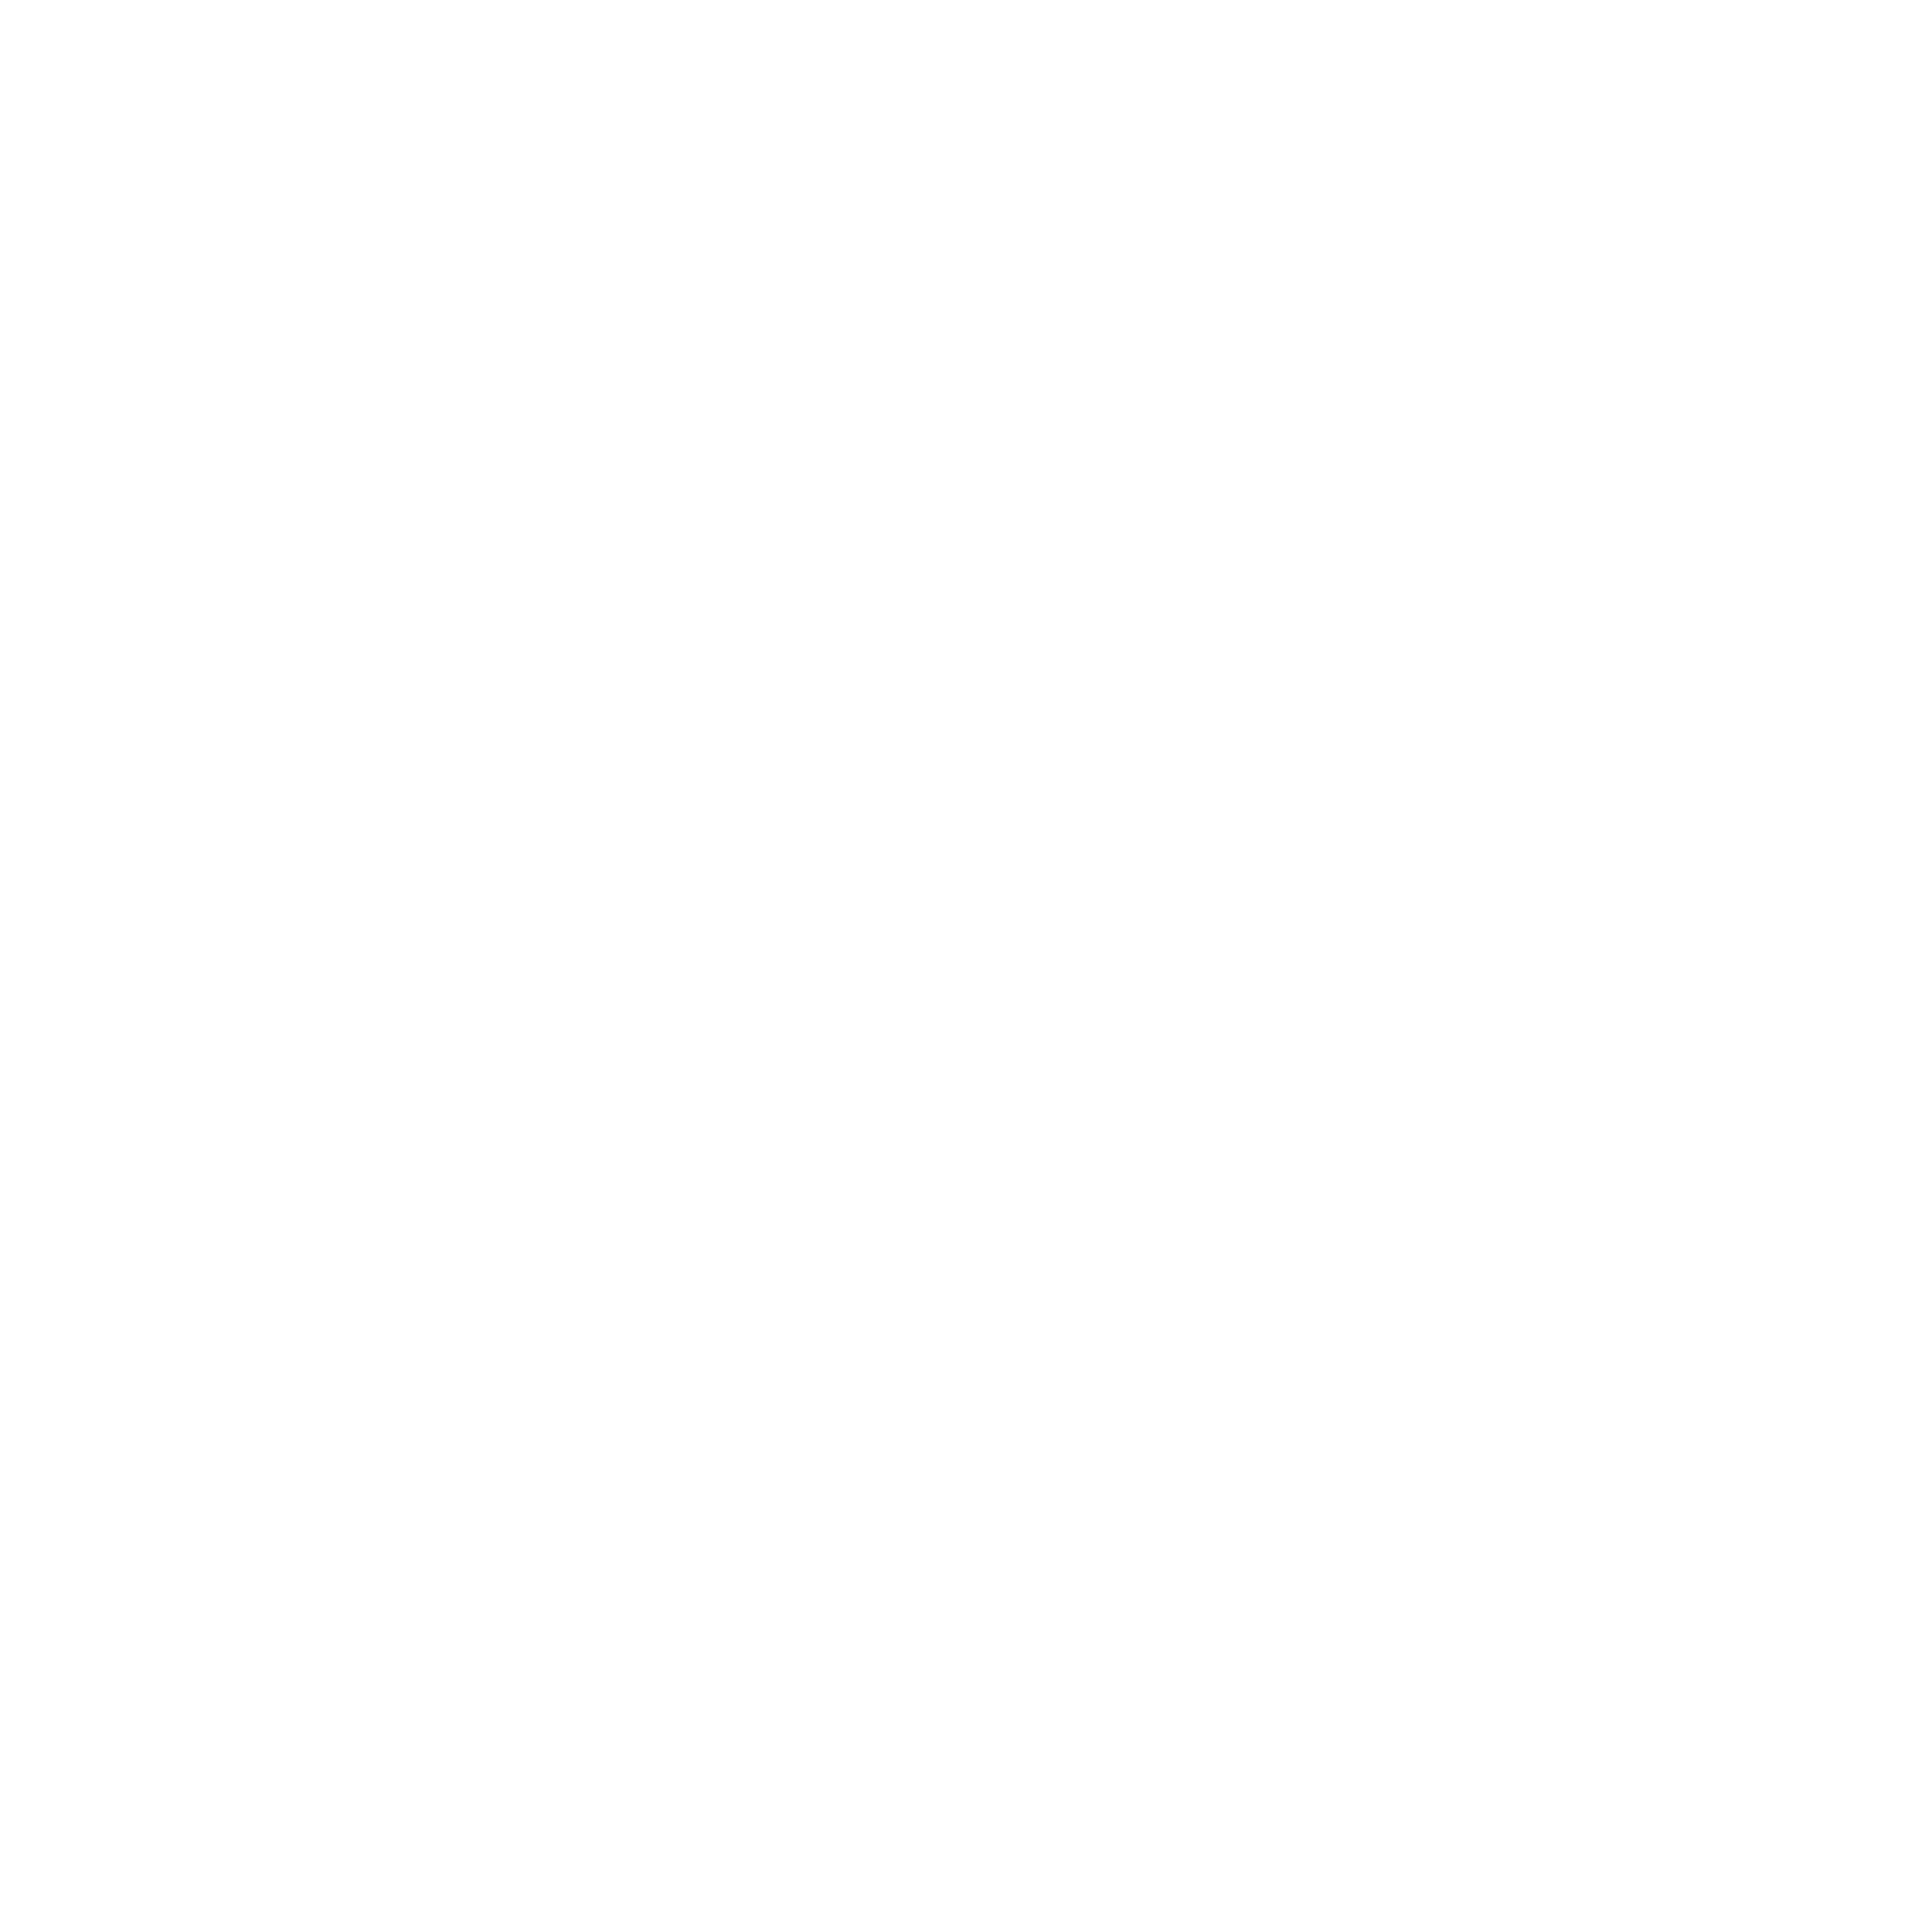

In [27]:
display(Image(filename='temp/ggplot.png'))

In [28]:
%%R
write.table(
  counts_genes, 
  file = paste0('temp/expression.', release,'.counts.tsv'), 
  sep = '\t', row.names = F, quote = F)
write.table(
  tpm_genes, 
  file = paste0('temp/expression.', release,'.tpm.tsv'), 
  sep = '\t', row.names = F, quote = F)
write.table(
  tpm_transcripts, 
  file = paste0('temp/expression.', release,'.transcripts.tsv'),
  sep = '\t', row.names = F, quote = F)

# Validation

In [5]:
counts_genes = pd.read_csv('temp/expression.'+ release + '.counts.tsv', sep='\t')

In [14]:
tpm_genes = pd.read_csv('temp/expression.'+ release + '.tpm.tsv', sep='\t')
#tpm_transcripts = pd.read_csv('temp/expression.'+ release + '.transcripts.tsv', sep='\t')

In [15]:
counts_genes.columns.str.contains('ibm')

array([False, False, False, ..., False, False, False])

In [16]:
prev = tc.get(name='depmap-expression-87f8', version=7, file='DM19Q2.tpm')

In [21]:
tpm_genes[tpm_genes.columns[2:]] = tpm_genes[tpm_genes.columns[2:]].apply(lambda x: np.log2(x+1))

In [26]:
metadata = tc.get(name='internal-19q2-9504', version=24, file='sample_info')

[##################]100% |   3.9 MiB/s | 245.8 KiB / 245.8 KiB | Time:  0:00:00


KeyError: 'type'

In [130]:
# finding train and test set
trainame = [val for val in new1&prev if val[:3] == 'ACH']
testname = [val for val in new1-prev if val[:3] == 'ACH']

#looking at the 2000 most variable genes in the two sets
genetolookfor = 2000
gene_var = counts_genes[trainame].var(1).values
print(len(gene_var))
sorting = np.argsort(gene_var)[-genetolookfor:]

58813


In [133]:
# creating and reodering train and test sets
traindata = counts_genes[set(trainame)-unregistered].values[sorting].T
trainlabels = [metadata[metadata["DepMap_ID"]==val]["disease"].values[0] for val in counts_genes[set(trainame)-unregistered].columns.tolist() if val not in unregistered]

testdata = counts_genes[set(testname)-unregistered].values[sorting].T
testlabels = [metadata[metadata["DepMap_ID"]==val]["disease"].values[0] for val in counts_genes[set(testname)-unregistered].columns.tolist() if val not in unregistered]

In [134]:
traindata.shape

(1286, 2000)

In [ ]:
pca = PCA(50).fit(scale(data.values, axis=0, with_std=False))
dimred = pca.transform(scale(data.values, axis=0, with_std=False))

dimred.shape


In [135]:
# learn KNN classifier to the metadata diseases
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(dimred[:-10], trainlabels) 
predicted = neigh.predict(dimred[-10:])

In [136]:
predicted

'leukemia'

In [94]:
labels = trainlabels + testlabels
colors=[0]*len(trainlabels)
colors.extend([1]*len(testlabels))
data = np.vstack([traindata,testdata])

In [106]:
# plot them with TSNE, highlight the points that failed and show colors for diseases
dimred = TSNE(2,10).fit_transform(data)

In [108]:
scatter(dimred, labels=labels,colors=colors, radi=1.9)

## Save files for taiga

In [46]:
tc.update_dataset(dataset_permaname="depmap-expression-87f8",
                 upload_file_path_dict={'temp/expression.'+release+'.transcripts.tsv': 'TableTSV',
                                       'temp/expression.'+release+'.tpm.tsv': 'TableTSV',
                                       'temp/expression.'+release+'.counts.tsv': 'TableTSV'},
                 dataset_description="Updating to "+release,
                    
                 force_remove=True)

Uploading expression.19Q3.transcripts...
hitting https://cds.team/taiga/api/datafile/0bda6fad007e4b5a87e2dedd81cbcd69
Conversion and upload...:
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3

	 Done: expression.19Q3.transcripts properly converted and uploaded
Uploading expression.19Q3.tpm...
hitting https://cds.team/taiga/api/datafile/0bda6fad007e4b5a87e2dedd81cbcd69
Conversion and upload...:
	 Waiting in the task queue
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3
	 Uploading to S3

	 Done: expression.19Q3.tpm properly converted and uploaded
Uploading expression.19Q3.counts...
hitting https://cds.team/taiga/api/datafile/0bda6fad007e4b5a87e2dedd81cbcd69
Conversion and upload...:
	 Uploading to S3
	 Uploading to S3

	 Done: expression.19Q3.counts properly converted and uploaded
Creating the new version with these files:


	NEW: expression.19Q3.transcripts - TableTSV
	NEW: expression.19Q3.tpm - TableTSV
	NEW: expression.19Q3.counts - TableTSV
hitting https://cds.team/taiga/api/datasetVersion

Dataset version with id 5bd5962ccb0444d1bb5cdd59d64e302d created. You can access to this dataset version directly with this url: https://cds.team/taiga/dataset_version/5bd5962ccb0444d1bb5cdd59d64e302d


'5bd5962ccb0444d1bb5cdd59d64e302d'

## Fusion post processing

In [ ]:
terra.wait_for_submission(submission_id2)

In [59]:
aggregate = refwm.get_config('Aggregate_Fusion_Calls')
aggregate

{'deleted': False,
 'inputs': {'aggregate_set_files_workflow.aggregate_set_files.disk_space': '250',
  'aggregate_set_files_workflow.aggregate_set_files.output_file_name': '"Fusions.aggregated.tsv"',
  'aggregate_set_files_workflow.aggregate_set_files.aggregate_files_script': 'workspace.aggregate_fusions_script',
  'aggregate_set_files_workflow.aggregate_set_files.num_preempt': '5',
  'aggregate_set_files_workflow.aggregate_set_files.sample_files': 'this.samples.fusion_predictions_abridged',
  'aggregate_set_files_workflow.aggregate_set_files.memory': '3'},
 'methodConfigVersion': 7,
 'methodRepoMethod': {'methodName': 'Aggregate_files_set',
  'methodVersion': 2,
  'methodNamespace': 'gkugener',
  'methodUri': 'agora://gkugener/Aggregate_files_set/2',
  'sourceRepo': 'agora'},
 'name': 'Aggregate_Fusion_Calls',
 'namespace': 'gkugener',
 'outputs': {'aggregate_set_files_workflow.aggregate_set_files.output_merged_file': 'this.fusions_star'},
 'prerequisites': {},
 'rootEntityType': 'sam

In [60]:
refwm.update_config(aggregate)
submission_id2 = refwm.create_submission(aggregate['name'], 'All_samples')

Successfully updated configuration gkugener/Aggregate_Fusion_Calls
Successfully created submission c853b79b-c226-4b29-a718-5875b7f74e10.


In [ ]:
terra.wait_for_submission(submission_id2)

In [10]:
refwm.get_sample_sets().loc['All_samples']['fusions_star']

fusions_star                                                                     NaN
mergedExonUsageRObj_hg38                                                         NaN
rsem_genes_expected_count                                                        NaN
rsem_genes_tpm                                                                   NaN
rsem_transcripts_expected_count                                                  NaN
rsem_transcripts_isopct                                                          NaN
rsem_transcripts_tpm                                                             NaN
samples                            [dm_ACH-000001, dm_ACH-000002, dm_ACH-000003, ...
Name: all_samples, dtype: object

In [37]:
! gsutil cp $aggregated "temp/expression.fusion.tsv"

Copying gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd50046a968/15ab70c1-73af-44bc-9aeb-750ef6d70bc8/aggregate_set_files_workflow/7d6bdfe1-27fb-478b-ade1-fcda622c4960/call-aggregate_set_files/Fusions.aggregated.tsv...
/ [1 files][ 30.2 KiB/ 30.2 KiB]                                                
Operation completed over 1 objects/30.2 KiB.                                     


### Overview

This document contains the code used to generate the unfiltered and filtered versions of the fusion datasets for the release. The bottom of the document also contains some comparisons between the release fusion dataset, CCLE2 fusion calls, and the translocation data from CCLE2.

In [52]:
%%R
source('../JKBio/gkugener/RScripts/load_libraries_and_annotations.R')
source("CCLE_postp_function.R")
filepath <- 'temp/expression.fusion.tsv'
release <- '19Q3'

## Generate filtered fusion table

Release: `r release`

We want to apply filters to the fusion table to reduce the number of artifacts in the dataset. Specifically, we filter the following:

* Remove fusions involving mitochondrial chromosomes, or HLA genes, or immunoglobulin genes
* Remove red herring fusions (from STAR-Fusion annotations column)
* Remove recurrent in CCLE (>= 25 samples)
* Remove fusion with (SpliceType=" INCL_NON_REF_SPLICE" and LargeAnchorSupport="No" and FFPM < 0.1)
* Remove fusions with FFPM < 0.05 (STAR-Fusion suggests using 0.1, but looking at the translocation data, this looks like it might be too aggressive)

In [53]:
%%R
unfiltered_fusions <- readFusions(filepath)
filtered_fusions <- filterFusions(unfiltered_fusions)

In [54]:
%%R
# Save the files (to be uploaded to taiga)
write.table(
  unfiltered_fusions,
  file = paste0('temp/fusions.',release, '.unfiltered.tsv'),
  sep = '\t', quote = F, row.names = F
)
write.table(
  filtered_fusions,
  file = paste0('temp/fusions.', release, '.filtered.tsv'),
  sep = '\t', quote = F, row.names = F
)

# Validation

## Validation Protocol:

to validate fusions, one should be able to list all cells with known fusions (i.e. elwing sarcoma) and check for each new cell in this set of knownfusioncells, if the fusion is present or not. and validate the fusion quality this way.

In [81]:
# check that all cells lines are present on fusion unfiltered
df = pd.read_csv('temp/fusions.'+release+'.unfiltered.tsv', sep='\t')
new = set([i.split('_')[1][:10] for i in list(set(df["DepMap_ID"].tolist()))])
print(prev - new, new-prev)

{'gene_id', 'transcript_id(s)'} {'ACH-001616'}


In [80]:
# remove fusions from the same samples as for that failed expression threshold


{'gene_id', 'transcript_id(s)'}

# Uploading to Taiga

In [55]:
tc.update_dataset(dataset_permaname="depmap-fusions-7990",
                     upload_file_path_dict={'temp/fusions.'+release+'.filtered.tsv': 'TableTSV',
                                        'temp/fusions.'+release+'.unfiltered.tsv': 'TableTSV'},
                 dataset_description="Updating to "+release,
                 force_remove=True)


Uploading fusions.19Q3.filtered...
hitting https://cds.team/taiga/api/datafile/cc2250454e8f44a7ae35e71530e5db53
Conversion and upload...:
	 Waiting in the task queue

	 Done: fusions.19Q3.filtered properly converted and uploaded
Uploading fusions.19Q3.unfiltered...
hitting https://cds.team/taiga/api/datafile/cc2250454e8f44a7ae35e71530e5db53
Conversion and upload...:
	 Uploading to S3

	 Done: fusions.19Q3.unfiltered properly converted and uploaded
Creating the new version with these files:
	NEW: fusions.19Q3.filtered - TableTSV
	NEW: fusions.19Q3.unfiltered - TableTSV
hitting https://cds.team/taiga/api/datasetVersion

Dataset version with id b707cbd721e04d59871dc10ab5e6556f created. You can access to this dataset version directly with this url: https://cds.team/taiga/dataset_version/b707cbd721e04d59871dc10ab5e6556f


'b707cbd721e04d59871dc10ab5e6556f'

# IF want to merge here instead of on Terra:

In [39]:
newsamples

NameError: name 'newsamples' is not defined

In [48]:
prevsamplesets = ['CCLE_19Q3interim',samplesetname]
samples = []
for i in prevsamplesets:
    samples.extend(refwm.get_sample_sets().loc[i].samples)
res = []
terrasamp = refwm.get_samples()
for i, sample in enumerate(samples):
    res.append(terrasamp.loc[sample])
    genes_fusion = res[i]['fusion_predictions_abridged']
    rsem_genes_transcripts = res[i]['rsem_isoforms']
    rsem_genes_expected_count = res[i]['rsem_genes']
    ! gsutil cp $rsem_genes_expected_count 'temp/' && gsutil cp $rsem_genes_transcripts 'temp/' && gsutil cp $genes_fusion 'temp/'

Copying gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd50046a968/25b86d44-d5d3-481a-9c29-5438c9905f44/rsem_workflow/7b23b231-27f3-47c4-b3bb-8df48393b187/call-rsem/ibm_ACH-001616.rsem.genes.results...
- [1 files][  6.3 MiB/  6.3 MiB]                                                
Operation completed over 1 objects/6.3 MiB.                                      
Copying gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd50046a968/25b86d44-d5d3-481a-9c29-5438c9905f44/rsem_workflow/7b23b231-27f3-47c4-b3bb-8df48393b187/call-rsem/ibm_ACH-001616.rsem.isoforms.results...
/ [1 files][ 13.6 MiB/ 13.6 MiB]                                                
Operation completed over 1 objects/13.6 MiB.                                     
Copying gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd50046a968/988fb43c-f90d-4327-ba52-be47db7d5f46/trinity_cleaned/9570c783-9757-4a32-a569-b98d02b8a7d6/call-StarFusion/attempt-2/ibm_ACH-001616.star-fusion.fusion_predictions.abridged.tsv...
/ [1 files][ 23.3 KiB/ 23.3 KiB]           

Copying gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd50046a968/39a4b936-8772-49ce-93f8-482b4d18b0bd/rsem_workflow/256b7988-14b3-42ff-b179-4c2b2125785c/call-rsem/ibm_ACH-002018.rsem.isoforms.results...
| [1 files][ 13.6 MiB/ 13.6 MiB]                                                
Operation completed over 1 objects/13.6 MiB.                                     
Copying gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd50046a968/82f53a64-3dc3-40bd-af81-def43059b7a0/trinity_cleaned/c5c749b5-f0ca-4e85-95fa-5356187d6ec8/call-StarFusion/ibm_ACH-002018.star-fusion.fusion_predictions.abridged.tsv...
/ [1 files][ 10.4 KiB/ 10.4 KiB]                                                
Operation completed over 1 objects/10.4 KiB.                                     
Copying gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd50046a968/39a4b936-8772-49ce-93f8-482b4d18b0bd/rsem_workflow/660c2ff0-cd28-4659-bd3b-b826e244f337/call-rsem/ibm_ACH-001636.rsem.genes.results...
- [1 files][  6.3 MiB/  6.3 MiB]                     

In [50]:
mainres = refwm.get_sample_sets().loc['DM19Q2_PATHS_CORRECTED_V2']
maingenes_fusion = mainres['fusions_star']
mainrsem_genes_tpm = mainres['rsem_genes_tpm']
mainrsem_genes_transcripts = mainres['rsem_transcripts_tpm']
mainrsem_genes_expected_count = mainres['rsem_genes_expected_count']
! gsutil cp $mainrsem_genes_expected_count "temp/" && gsutil cp $mainrsem_genes_transcripts "temp/" && gsutil cp $maingenes_fusion "temp/expression.fusion.tsv" && gsutil cp $mainrsem_genes_tpm "temp/"

Copying gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd50046a968/3a120a00-cc0e-4e61-81f0-2efb6f39a40f/rsem_aggregate_results_workflow/7bb43c84-bedb-402a-bdfa-c1e20cba11e5/call-rsem_aggregate_results/DM19Q2_PATHS_CORRECTED_V2.rsem_genes_expected_count.txt.gz...
Resuming download for temp/DM19Q2_PATHS_CORRECTED_V2.rsem_genes_expected_count.txt.gz
- [1 files][ 68.2 MiB/ 68.2 MiB]                                                
Operation completed over 1 objects/68.2 MiB.                                     
Copying gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd50046a968/3a120a00-cc0e-4e61-81f0-2efb6f39a40f/rsem_aggregate_results_workflow/7bb43c84-bedb-402a-bdfa-c1e20cba11e5/call-rsem_aggregate_results/DM19Q2_PATHS_CORRECTED_V2.rsem_transcripts_tpm.txt.gz...
| [1 files][228.9 MiB/228.9 MiB]    8.9 MiB/s                                   
Operation completed over 1 objects/228.9 MiB.                                    
Copying gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd50046a968/7ab5a444-1b66-41ea-b1

In [54]:
mainres['rsem_genes_expected_count']

'gs://fc-secure-639c94ba-2b0d-4960-92fc-9cd50046a968/3a120a00-cc0e-4e61-81f0-2efb6f39a40f/rsem_aggregate_results_workflow/7bb43c84-bedb-402a-bdfa-c1e20cba11e5/call-rsem_aggregate_results/DM19Q2_PATHS_CORRECTED_V2.rsem_genes_expected_count.txt.gz'

In [51]:
addSamplesRSEMToMain(res,mainres)

[autoreload of wand._api failed: Traceback (most recent call last):
  File "/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 378, in superreload
    module = reload(module)
  File "/anaconda3/envs/py36/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/anaconda3/envs/py36/lib/python3.6/importlib/__init__.py", line 147, in reload
    raise ImportError(msg.format(name), name=name)
ImportError: module wand.api not in sys.modules
]


In [52]:
genes_fusion = ['temp/'+val['fusion_predictions_abridged'].split('/')[-1] for val in res]
addToMainFusion(genes_fusion,'temp/expression.fusion.tsv')

> /Users/jeremie/Documents/Projects/BroadInstitute/ccle_processing/CCLE_postp_function.py(152)addToMainFusion()
-> maindata = pd.read_csv(main_filename, sep='\t')
(Pdb) c
